In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Функция распределения

In [3]:
x = np.random.randint(low=1, high=10, size=1000)

In [4]:
result = []
for i in np.unique(x):
    count = 0
    for xi in x: 
        if xi <= i:
            count +=1
    result.append(count / 1000)
            

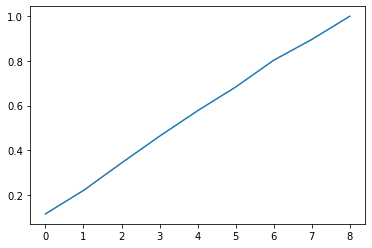

In [5]:
plt.plot(result)

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import expon

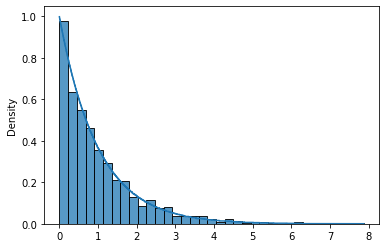

In [10]:
x = sorted(expon.rvs(size=1000))
sns.histplot(x, stat='density')
plt.step(x, expon.pdf(x))

# ЦПТ

In [98]:
N = [5, 10, 50, 100, 500]

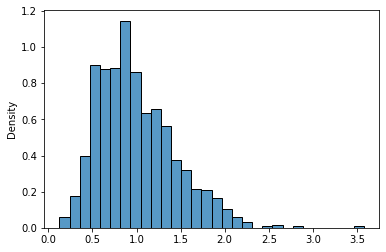

0.4407760430188191
0.9977098109248689


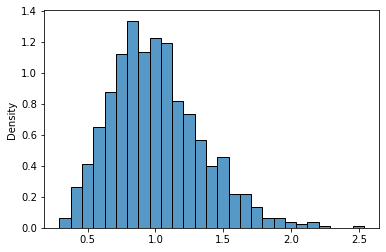

0.33342071810628277
1.0033036042801478


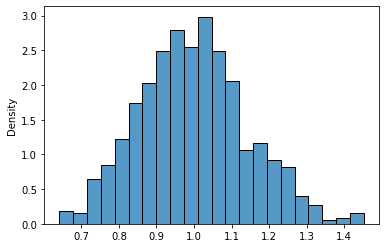

0.1434428452885587
0.9983346259851094


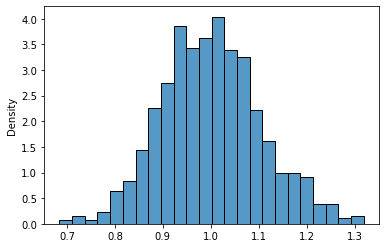

0.10359623546226622
1.0007103017773293


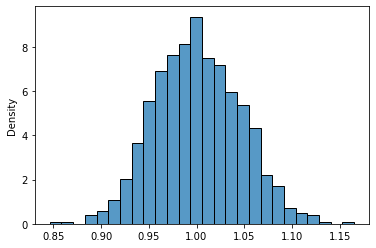

0.04462257099937713
1.001041420383419


In [102]:
for n in N: 
    mean = []
    for _ in range(1001):
        mean.append(np.random.choice(expon.rvs(size=10000), size=n).mean())
    sns.histplot(mean, stat='density')
    plt.show()
    print(np.std(mean))
    print(np.mean(mean))

# Метод имитации отжига

In [13]:
from scipy.optimize import basinhopping
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
%matplotlib inline

In [14]:
a = np.random.uniform(low=0, high=10, size=(100, 2))

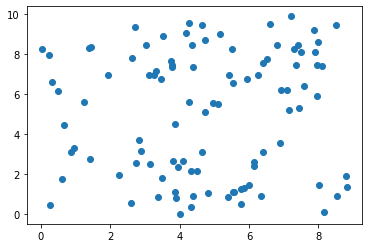

In [15]:
plt.plot(a[:, 0], a[:, 1], 'o')

In [16]:
def simulatedannealing(L, tmax, tmin):
    N = len(L)
    t = tmax
    current_state = np.random.choice(np.arange(0, N), size=N, replace=False)
    def dist(L):
        total_dist = 0
        for i in range(1, len(L) - 1):
            dist = euclidean(L[i], L[i-1])
            total_dist += dist
        total_dist += euclidean(L[0], L[len(L) - 1])
        return total_dist
    
    current_dist = dist(L[current_state])
    
    def generate_state(current_state):
        state = current_state.copy()
        rv = sorted(np.random.choice(np.arange(0, len(state)), replace=False, size=2))
        state2 = state[rv[0]: rv[1] + 1].copy()
        state[rv[0]: rv[1] + 1] = state2[::-1]
        return state
        
    
    def get_trans_prob(D0, D, t): 
        return np.random.uniform() <= np.exp(-(D - D0) / t)
    
    for x in range(1, 100000):
        new_state = generate_state(current_state)
        new_dist = dist(L[new_state])
        if (new_dist <= current_dist) or (get_trans_prob(current_dist, new_dist, t)): 
            current_state = new_state
            current_dist = new_dist
        else: 
            pass
        t = tmax * 0.1 / x
        if t < tmin: 
            break

    
    return L[current_state]
    
    

In [ ]:
b = simulatedannealing(a, 10, 0.00001)

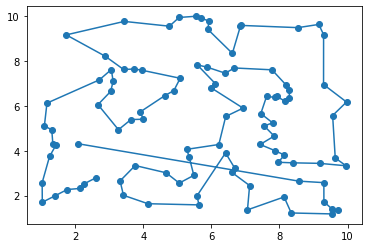

In [246]:
plt.plot(b[:, 0], b[:, 1], '-o')

In [3]:
from scipy.optimize import rosen

In [16]:
from scipy.optimize import differential_evolution

In [21]:
differential_evolution(rosen, bounds=((0, 10), (0, 10), (0, 10)))

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 12694
     nit: 281
 success: True
       x: array([1., 1., 1.])

# Оптимизация функций

In [2]:
def f(x): 
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

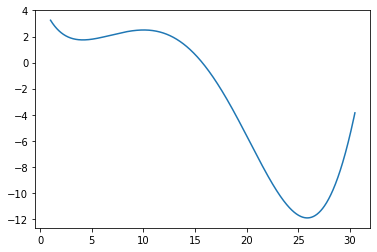

In [26]:
x = np.linspace(1, 30.5, 1000)
plt.plot(x, f(x))

In [4]:
from scipy.optimize import minimize

In [14]:
minimize(f, x0=30, method='BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [22]:
differential_evolution(f, bounds=[(1, 30)])

     fun: array([-11.89889467])
     jac: array([1.42108535e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019535])

In [32]:
def g(x): 
    return f(x).astype(int)

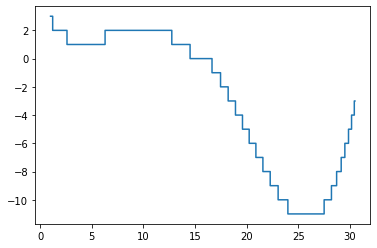

In [40]:
plt.step(x, g(x))

In [41]:
minimize(g, x0=30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [44]:
differential_evolution(g, bounds=[(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.99579797])

# Sklearn datasets

In [41]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [33]:
d = datasets.make_moons()

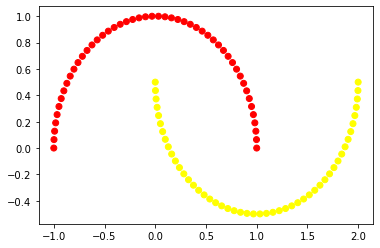

In [34]:
color = ListedColormap(['red', 'yellow'])
pyplot.scatter(d[0][:, 0], d[0][:, 1], c=d[1], cmap=color)

In [33]:
d = datasets.make_moons()

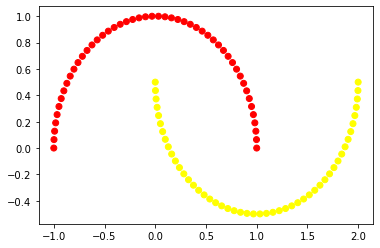

In [34]:
color = ListedColormap(['red', 'yellow'])
pyplot.scatter(d[0][:, 0], d[0][:, 1], c=d[1], cmap=color)

# Cross-validation

In [81]:
from sklearn import model_selection

In [49]:
data = datasets.load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['label'] = data['target']
df['label'] = df['label'].map(lambda x: data['target_names'][x])

In [60]:
train_X, test_X, train_y, test_y = train_test_split(data['data'], data['target'], test_size=0.3, random_state=42)

In [61]:
len(train_X), len(test_X), len(train_y), len(test_y)

(105, 45, 105, 45)

In [63]:
print(train_y, test_y, sep='\n\n')

[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [78]:
kf = KFold(n_splits=5, shuffle=True, random_state=43)

In [79]:
for train_index, test_index in kf.split(train_X): 
    print('Train indicies: ', train_index)
    print('Test indicies: ', test_index)

Train indicies:  [  3   4   6   7  10  12  14  16  17  18  19  21  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  39  40  41  42  43  46  47  48  49
  50  51  52  53  54  55  58  59  60  61  62  63  64  65  66  67  68  69
  70  72  73  74  75  76  78  79  80  81  82  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 103 104]
Test indicies:  [  0   1   2   5   8   9  11  13  15  20  22  38  44  45  56  57  71  77
  83  84 102]
Train indicies:  [  0   1   2   3   4   5   7   8   9  10  11  13  15  16  17  18  20  21
  22  23  25  26  27  28  29  30  31  32  34  35  36  38  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  64  65  66  67  68  70  71  73  74  75  76  77  78  79  80  83  84  85
  86  87  88  90  91  92  94  95 101 102 103 104]
Test indicies:  [  6  12  14  19  24  33  37  39  62  63  69  72  81  82  89  93  96  97
  98  99 100]
Train indicies:  [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  1

In [84]:
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
skf.split(train_X, train_y)

<generator object _BaseKFold.split at 0x000001ACFA268C10>

In [85]:
for train_index, test_index in skf.split(train_X, train_y): 
    print('Train: ', train_index)
    print('Test: ', test_index)

Train:  [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  18  19
  20  21  22  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  51  52  53  54  55  56  57  58
  59  63  64  67  68  69  73  74  75  76  78  79  81  82  83  84  85  87
  88  90  91  92  93  94  95  96  97  98  99 104]
Test:  [  8  17  23  24  50  60  61  62  65  66  70  71  72  77  80  86  89 100
 101 102 103]
Train:  [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  17  18  20
  22  23  24  25  29  30  31  32  33  34  35  36  37  38  39  42  43  44
  46  48  49  50  51  52  53  54  55  56  58  60  61  62  65  66  67  68
  69  70  71  72  74  75  77  78  79  80  81  82  83  84  86  87  88  89
  90  91  93  94  96  97  99 100 101 102 103 104]
Test:  [ 7 16 19 21 26 27 28 40 41 45 47 57 59 63 64 73 76 85 92 95 98]
Train:  [  1   6   7   8   9  10  12  13  14  15  16  17  18  19  21  22  23  24
  26  27  28  29  30  31  32  33  34  35  37  38  39 

In [87]:
loo = model_selection.LeaveOneOut()
for train, test in loo.split(train_X): 
    print(train)
    print(test)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[1]
[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36


  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[37]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[38]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[39]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[59]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[60]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  3

  90  91  92  93  94  95  96  97  98  99 100 102 103 104]
[101]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 103 104]
[102]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 104]
[103]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18 

# Linear Regression

In [88]:
from sklearn import linear_model, metrics

In [104]:
colors = ListedColormap(['red', 'yellow'])

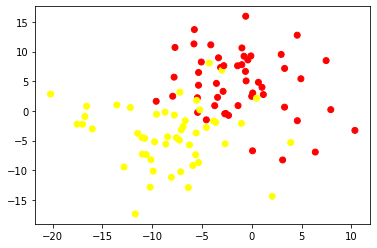

In [110]:
data = datasets.make_blobs(n_features=2, cluster_std=5.5, random_state=1, centers=2)
pyplot.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap=colors)

In [112]:
train_data, test_data, train_target, test_target = train_test_split(data[0], data[1], test_size=0.2, random_state=1)

In [113]:
len(train_data), len(test_data)

(80, 20)

In [115]:
ridge_classifier = linear_model.RidgeClassifier(random_state=1)
ridge_classifier.fit(train_data, train_target)
ridge_predictions = ridge_classifier.predict(test_data)

In [116]:
test_target

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [117]:
ridge_predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [118]:
metrics.accuracy_score(test_target, ridge_predictions)

0.85

In [120]:
ridge_classifier.coef_, ridge_classifier.intercept_

(array([[-0.08213844, -0.07265405]]), array([-0.29908619]))

In [191]:
log_reg = linear_model.LogisticRegression(random_state=0)
log_reg.fit(train_data, train_target)
log_predictions = log_reg.predict(test_data)

In [193]:
print(log_predictions)
print(test_target)

[0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1]
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1]


## Cross-validation для линейных моделей

In [199]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, data[0], data[1], scoring='f1', cv=10)

In [200]:
ridge_scoring.mean()

0.8721717171717172

In [201]:
log_scoring = model_selection.cross_val_score(log_reg, data[0], data[1], scoring='f1', cv=10 )
log_scoring.mean()

0.8721717171717172

## CV с заданными параметрами

In [153]:
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = model_selection.StratifiedShuffleSplit(test_size=0.3, n_splits=20, random_state=0)

ridge_scoring = model_selection.cross_val_score(ridge_classifier, data[0], data[1], scoring=scorer, cv=cv_strategy)
log_scoring = model_selection.cross_val_score(log_reg, data[0], data[1], scoring=scorer, cv=cv_strategy)

In [154]:
ridge_scoring.mean(), log_scoring.mean()

(0.8799999999999999, 0.8799999999999999)

# Регрессия

In [215]:
# ?datasets.make_regression
from pandas.plotting import scatter_matrix
import seaborn as sns

In [231]:
X, y, coef = datasets.make_regression(n_features=2, n_targets=1, n_informative=1, noise=5, coef=True, random_state=2)

In [232]:
df = pd.DataFrame(data=X, columns=['f1', 'f2'])
df['target'] = y

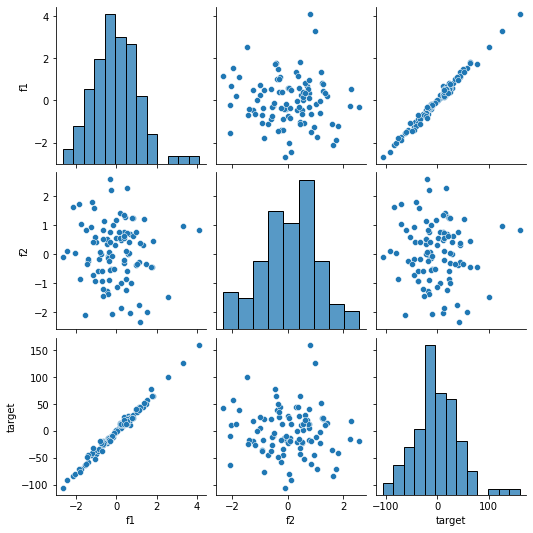

In [233]:
sns.pairplot(df)

In [234]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, 
                                                                   random_state=2)

In [235]:
len(train_X), len(test_X)

(70, 30)

In [236]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_X, train_y)
lin_predictions = lin_reg.predict(test_X)

In [237]:
metrics.r2_score(test_y, lin_predictions)

0.9928074883046519

In [238]:
lin_reg.coef_

array([ 3.81943218e+01, -7.42480942e-03])

In [239]:
coef

array([38.07925837,  0.        ])

In [243]:
score = model_selection.cross_val_score(lin_reg, df.iloc[:, :-1], df.iloc[:, -1], scoring='neg_mean_absolute_error', 
                                       cv=10)

In [247]:
mae = metrics.make_scobrer(metrics.mean_absolute_error, greater_is_better=True)

In [249]:
score = model_selection.cross_val_score(lin_reg, df.iloc[:, :-1], df.iloc[:, -1], scoring=mae, 
                                       cv=10)

In [250]:
score.mean()

4.070071498779694

In [253]:
?linear_model.Lasso

In [256]:
lr = linear_model.Lasso(random_state=0)
lasso_score = model_selection.cross_val_score(lr, df.iloc[:, :-1], df.iloc[:, -1], scoring=mae, cv=10)

In [257]:
lasso_score.mean()

4.154478246666398

In [261]:
lr.fit(train_X, train_y)
preds = lr.predict(test_X)
metrics.r2_score(test_y, preds)

0.9922711618362721